MCD 3er semestre  
Visualización de Grandes Bases de Datos  
#### Challenge 2 Intermedio  
Alumno: Fernando Arturo Arevalo Perez  
Codigo de alumno: 323018942

1. Configuración del Entorno en Databricks  
El cual fue la creación y configuración de mi cluster o compute junto con el cargado de las librerias necesarias. Además de la creación de este notebook.

2. Descarga de datos  
Datos descargados de:  
Base de datos: Wine Quality Dataset  
Plataforma: UCI Machine Learning Repository  
Para este challenge trabajaremos especificamente con los datos de: winequality-red.csv

3. Exploración y Limpieza de Datos

a. Importar Bibliotecas Necesarias

In [0]:
# Importar PySpark y Spark ML
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

b. Leer el Archivo CSV en un DataFrame de Spark

In [0]:
# Leer el archivo CSV
data_path = "/FileStore/tables/winequality_red.csv"

# Leer el CSV con el delimitador ';'
df = spark.read.csv(data_path, header=True, sep=';', inferSchema=True)

# Mostrar las primeras filas
display(df)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5


c. Análisis Exploratorio de Datos (EDA)

In [0]:
# Verificar el esquema del DataFrame
df.printSchema()

# Mostrar estadísticas descriptivas
df.describe().show()

# Contar valores nulos por columna
df.select([col(c).isNull().alias(c) for c in df.columns]).show()

# Verificar la distribución de la variable objetivo 'quality'
df.groupBy("quality").count().orderBy("quality").show()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)

+-------+------------------+-------------------+-------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+------------------+------------------+------------------+
|summary|     fixed acidity|   volatile acidity|        citric acid|    residual sugar|           chlorides|free sulfur dioxide|total sulfur dioxide|             density|                 pH|         sulphates|           alcohol

Observaciones Importantes:
  
Distribución de 'quality': La variable 'quality' suele tener valores entre 3 y 8, con la mayoría de los vinos en torno a 5-6.
  
Valores Nulos: Si hay valores nulos, es necesario decidir cómo manejarlos (eliminación o imputación).

d. Manejo de Valores Nulos

In [0]:
# Eliminar filas con valores nulos
df_clean = df.dropna()

# Verificar nuevamente
df_clean.select([col(c).isNull().alias(c) for c in df_clean.columns]).show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+-----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|   pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+-----+---------+-------+-------+
|        false|           false|      false|         false|    false|              false|               false|  false|false|    false|  false|  false|
|        false|           false|      false|         false|    false|              false|               false|  false|false|    false|  false|  false|
|        false|           false|      false|         false|    false|              false|               false|  false|false|    false|  false|  false|
|        false|           false|      false|         false|    false|              false|     

e. Transformar la Variable Objetivo para Clasificación

El modelo de regresión logística es un modelo de clasificación binaria. Dado que 'quality' es una variable ordinal, necesitamos convertirla en una clasificación binaria. Por ejemplo, podemos clasificar los vinos como "Bueno" o "Malo" basándonos en un umbral.
  
Ejemplo de Clasificación Binaria:
  
Calidad >= 7: Bueno (1)  
Calidad < 7: Malo (0)

In [0]:
# Crear una nueva columna 'label' para la clasificación binaria
df_binary = df_clean.withColumn("label", when(col("quality") >= 7, 1).otherwise(0))

# Verificar la distribución de la nueva etiqueta
df_binary.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|  217|
|    0| 1382|
+-----+-----+



4. Preparación de los Datos para el Modelo

a. Selección de Características  
Excluiremos la columna 'quality' ya que hemos creado 'label' para la clasificación.

In [0]:
# Seleccionar características y la etiqueta
feature_columns = [col for col in df_binary.columns if col not in ['quality', 'label']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

b. División del Conjunto de Datos  
Dividiremos los datos en conjuntos de entrenamiento y prueba.

In [0]:
# Dividir los datos en entrenamiento y prueba (70% - 30%)
train_data, test_data = df_binary.randomSplit([0.7, 0.3], seed=42)

# Verificar las divisiones
print("Número de filas en entrenamiento:", train_data.count())
print("Número de filas en prueba:", test_data.count())

Número de filas en entrenamiento: 1173
Número de filas en prueba: 426


c. Configuración del Pipeline de Spark ML  
Usaremos un pipeline para ensamblar las características y entrenar el modelo.

In [0]:
# Inicializar el modelo de Regresión Logística
lr = LogisticRegression(featuresCol='features', labelCol='label')

# Crear el pipeline
pipeline = Pipeline(stages=[assembler, lr])

5. Entrenamiento del Modelo de Regresión Logística

In [0]:
# Entrenar el modelo
model = pipeline.fit(train_data)

6. Evaluación del Modelo  
Evaluaremos el rendimiento del modelo utilizando el conjunto de prueba.

a. Hacer Predicciones

In [0]:
# Realizar predicciones en el conjunto de prueba
predictions = model.transform(test_data)

# Mostrar algunas predicciones
display(predictions.select("features", "label", "prediction", "probability"))

features,label,prediction,probability
"Map(vectorType -> dense, length -> 11, values -> List(4.9, 0.42, 0.0, 2.1, 0.048, 16.0, 42.0, 0.99154, 3.71, 0.74, 14.0))",1,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.20847041206737585, 0.7915295879326242))"
"Map(vectorType -> dense, length -> 11, values -> List(5.0, 0.74, 0.0, 1.2, 0.041, 16.0, 46.0, 0.99258, 4.01, 0.59, 12.5))",0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8850915267424797, 0.1149084732575203))"
"Map(vectorType -> dense, length -> 11, values -> List(5.0, 1.04, 0.24, 1.6, 0.05, 32.0, 96.0, 0.9934, 3.74, 0.62, 11.5))",0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9885493150751744, 0.011450684924825594))"
"Map(vectorType -> dense, length -> 11, values -> List(5.1, 0.42, 0.0, 1.8, 0.044, 18.0, 88.0, 0.99157, 3.68, 0.73, 13.6))",1,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.4564171047683044, 0.5435828952316957))"
"Map(vectorType -> dense, length -> 11, values -> List(5.2, 0.32, 0.25, 1.8, 0.103, 13.0, 50.0, 0.9957, 3.38, 0.55, 9.2))",0,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.9920111685097212, 0.007988831490278847))"
"Map(vectorType -> dense, length -> 11, values -> List(5.2, 0.34, 0.0, 1.8, 0.05, 27.0, 63.0, 0.9916, 3.68, 0.79, 14.0))",0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.16489191569748077, 0.8351080843025193))"
"Map(vectorType -> dense, length -> 11, values -> List(5.2, 0.34, 0.0, 1.8, 0.05, 27.0, 63.0, 0.9916, 3.68, 0.79, 14.0))",0,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.16489191569748077, 0.8351080843025193))"
"Map(vectorType -> dense, length -> 11, values -> List(5.3, 0.47, 0.11, 2.2, 0.048, 16.0, 89.0, 0.99182, 3.54, 0.88, 13.5666666666667))",1,1.0,"Map(vectorType -> dense, length -> 2, values -> List(0.3609752638478173, 0.6390247361521827))"
"Map(vectorType -> dense, length -> 11, values -> List(5.3, 0.57, 0.01, 1.7, 0.054, 5.0, 27.0, 0.9934, 3.57, 0.84, 12.5))",1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.5895875876793318, 0.41041241232066816))"
"Map(vectorType -> dense, length -> 11, values -> List(5.4, 0.42, 0.27, 2.0, 0.092, 23.0, 55.0, 0.99471, 3.78, 0.64, 12.3))",1,0.0,"Map(vectorType -> dense, length -> 2, values -> List(0.8180599956289276, 0.18194000437107238))"


b. Evaluar el Rendimiento del Modelo  
Usaremos métricas como Precisión, Recall, F1-Score y Exactitud.

In [0]:
# Inicializar el evaluador
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Calcular la exactitud
accuracy = evaluator.evaluate(predictions)
print(f"Exactitud (Accuracy): {accuracy}")

# Calcular la precisión
evaluator.setMetricName("precisionByLabel")
precision = evaluator.evaluate(predictions)
print(f"Precisión (Precision): {precision}")

# Calcular el recall
evaluator.setMetricName("recallByLabel")
recall = evaluator.evaluate(predictions)
print(f"Recall: {recall}")

# Calcular F1 Score
evaluator.setMetricName("f1")
f1 = evaluator.evaluate(predictions)
print(f"Puntuación F1 (F1 Score): {f1}")

Exactitud (Accuracy): 0.8708920187793427
Precisión (Precision): 0.8943298969072165
Recall: 0.961218836565097
Puntuación F1 (F1 Score): 0.8562971453011082


c. Matriz de Confusión  
Para una evaluación más detallada, crearemos una matriz de confusión.

In [0]:
# Importar función de agrupación
from pyspark.sql.functions import col

# Crear la matriz de confusión
confusion_matrix = predictions.groupBy("label", "prediction").count().orderBy("label", "prediction")
confusion_matrix.show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|  347|
|    0|       1.0|   14|
|    1|       0.0|   41|
|    1|       1.0|   24|
+-----+----------+-----+



7. Mejoras y Optimización del Modelo  
Intentaremos mejorar y ompimizar el modelo mediante el ajuste de Hiperparámetros  
Usamos Cross-Validation y Grid Search para encontrar los mejores hiperparámetros.

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Crear una instancia del evaluador
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Crear el grid de parámetros
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Crear el CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=binary_evaluator,
                          numFolds=3)

# Entrenar con CrossValidator
cv_model = crossval.fit(train_data)

# Hacer predicciones
cv_predictions = cv_model.transform(test_data)

# Evaluar
auc = binary_evaluator.evaluate(cv_predictions)
print(f"Area Under ROC: {auc}")

Area Under ROC: 0.873002343916472


8. Visualización de Resultados
Aunque Spark ML no está optimizado para visualizaciones, podemos convertir los datos a Pandas para crear gráficos informativos.

a. Importar Bibliotecas de Visualización

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

b. Visualizar la Matriz de Confusión

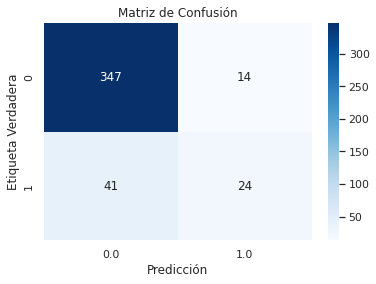

In [0]:
# Convertir la matriz de confusión a Pandas
confusion_pd = confusion_matrix.toPandas()

# Pivotar la tabla para la matriz de confusión
confusion_pivot = confusion_pd.pivot(index='label', columns='prediction', values='count')

# Crear un heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.show()

c. Curva ROC  
Para visualizar la Curva ROC, necesitamos probabilidades y etiquetas verdaderas.

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field probability. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


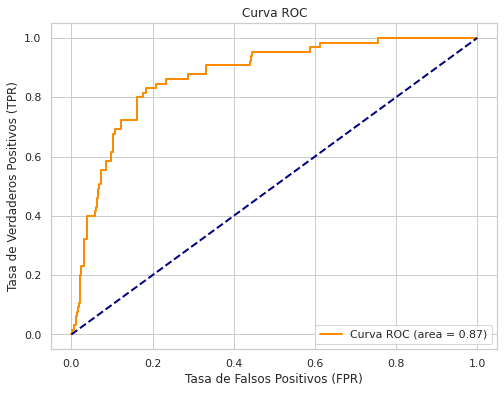

In [0]:
# Seleccionar las probabilidades y las etiquetas
roc_data = predictions.select("probability", "label").toPandas()

# Extraer la probabilidad de la clase positiva
roc_data['prob_positive'] = roc_data['probability'].apply(lambda x: x[1])

# Importar biblioteca para ROC
from sklearn.metrics import roc_curve, auc

# Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(roc_data['label'], roc_data['prob_positive'])
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

9. Conclusión  
En este challenge he aprendido y practicado sobre el proceso de modelado predictivo utilizando PySpark y Spark ML en Databricks.  

He practicado los siguientes puntos:
  
Descargar y cargar datos desde fuentes externas.  
Explorar y limpiar datos para asegurar su calidad.  
Transformar variables para adecuarlas a tareas de machine learning.  
Construir pipelines de procesamiento y modelado en Spark ML.  
Entrenar y evaluar modelos de clasificación.  
Optimizar modelos mediante técnicas como Cross-Validation.  
Visualizar resultados para una mejor interpretación.
  
Cabe destacar que en gran medida me fue posible realizar esta practica ya que antes tomé el curso recomendado por el profesor Osvaldo en Udemy de "Databricks y Apache Spark para Big Data: de cero a experto".